In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
goldprice = yf.download("GC=F")
goldprice.reset_index(inplace = True)
usdx = yf.download("DX-Y.NYB")
usdx.reset_index(inplace=True)

closing_goldprice = goldprice[["Date", "Close"]]
closing_usdx = usdx[["Date", "Close"]]

np.save("cleaneddata/gold.npy", closing_goldprice.to_numpy())
np.save("cleaneddata/usdx.npy", closing_usdx.to_numpy())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


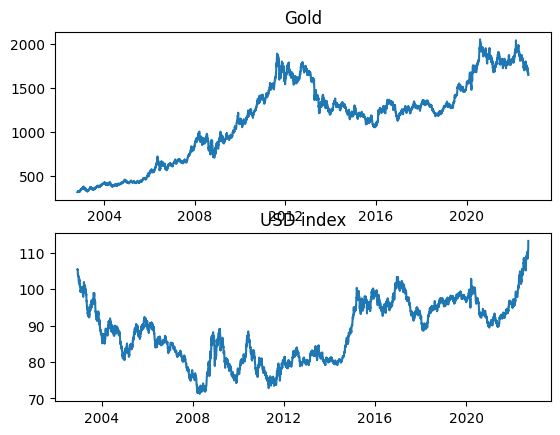

In [2]:
fig, axis = plt.subplots(2)
POINTS = 5000
x, y = closing_goldprice.iloc[-POINTS:,0], closing_goldprice.iloc[-POINTS:, 1] 
axis[0].plot(x, y)
axis[0].set_title("Gold")
x, y = closing_usdx.iloc[-POINTS:,0], closing_usdx.iloc[-POINTS:, 1] 
axis[1].plot(x, y)
axis[1].set_title("USD index")
plt.show()

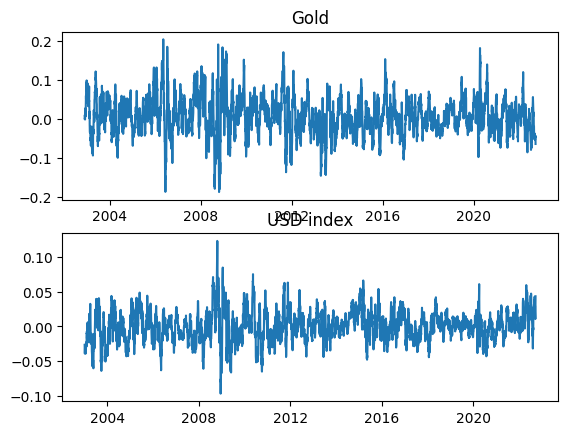

In [3]:
fig, axis = plt.subplots(2)
MONTH = 20
dates = closing_goldprice.iloc[-POINTS:,0]
x, y = closing_goldprice.iloc[-POINTS:,0], closing_goldprice.iloc[-POINTS:, 1].pct_change(MONTH)
axis[0].plot(x, y)
axis[0].set_title("Gold")
x, y = closing_usdx.iloc[-POINTS:,0], closing_usdx.iloc[-POINTS:, 1].pct_change(MONTH)
axis[1].plot(x, y)
axis[1].set_title("USD index")
plt.show()

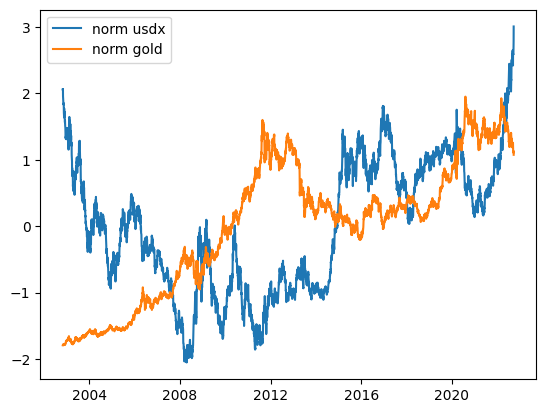

In [4]:
def normalise_df(df):
    return (df-df.mean())/df.std()

sliced_gold = closing_goldprice.iloc[-POINTS:, 1]
dates = closing_goldprice.iloc[-POINTS:, 0]
norm_gold = normalise_df(sliced_gold)
sliced_usdx = closing_usdx.iloc[-POINTS:, 1]
norm_usdx = normalise_df(sliced_usdx)

plt.plot(dates, norm_usdx, label= "norm usdx")
plt.plot(dates, norm_gold, label = 'norm gold')
plt.legend()